In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df= df.drop(['alive', 'who', 'embarked', 'class', 'deck'], axis=1)


In [11]:
df.head(3)
df.shape

(891, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 57.6+ KB


<AxesSubplot: xlabel='survived', ylabel='count'>

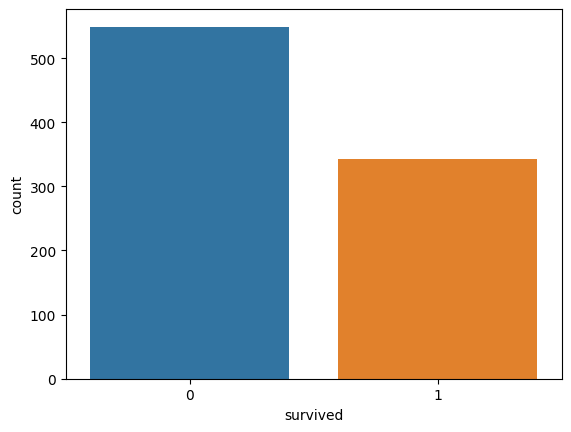

In [13]:
#visualisation des données 
#la visualisation de données nous a permis de conclure qu'il ya un disiquilibre dans les classes
sns.countplot(x  ='survived', data = df)

In [14]:
df['survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

<AxesSubplot: xlabel='pclass', ylabel='count'>

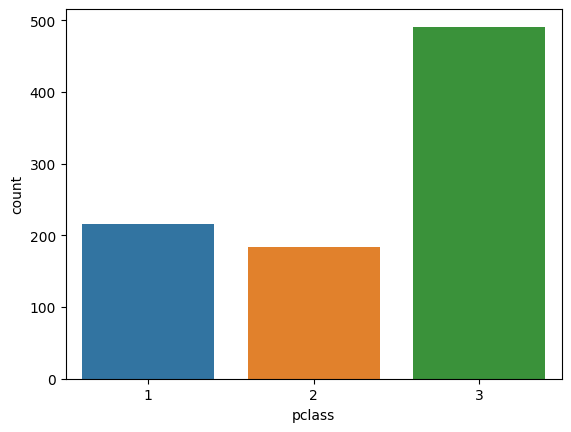

In [15]:
sns.countplot(x='pclass', data=df)

<AxesSubplot: ylabel='fare'>

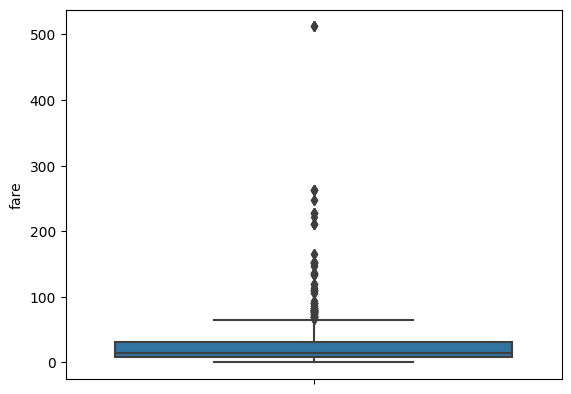

In [16]:

#ya peu de personne qui ont payé cher pour le billet
sns.boxplot(y = 'fare' , data=df)

In [17]:
pd.crosstab(df['sex'], df['adult_male'])
 

adult_male,False,True
sex,,
female,314,0
male,40,537


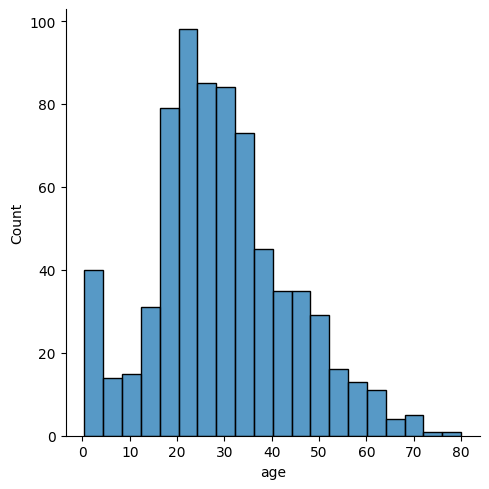

In [18]:
sns.displot(df['age'], kde= False, bins=20)

<AxesSubplot: xlabel='survived', ylabel='age'>

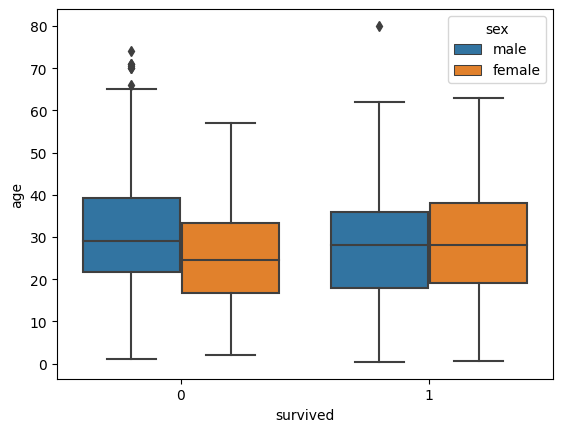

In [19]:
#relation entre age et variable cible (ceux qui sont survécu sont légerement plus jeunes)
sns.boxplot(x='survived' , y='age', hue='sex', data=df)

In [20]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
df['age'].quantile(0.99)

65.87

In [22]:
#Nettoyage de deonnées et gestion des valeurs manquantes
df.isna().sum() #variables manquantes : soit on supprimer des ligne soit remplacé

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
adult_male       0
embark_town      2
alone            0
dtype: int64

In [23]:
#on remplaces les valeurs manquantes par la moyenne
df.fillna(value={'age' : df['age'].mean()}, inplace=True)

In [24]:
df['age'].std()

13.002015226002882

In [25]:
df['embark_town'].value_counts(normalize=True)

Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: embark_town, dtype: float64

In [26]:
df.fillna(value={'embark_town' : 'Southampton' }, inplace=True)

In [27]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
adult_male     0
embark_town    0
alone          0
dtype: int64

In [28]:
#valeur <Q1 - 1,5IQR ou valeur > Q3 + 1,5*IQR variable adérente
def finding_outliers(data, variable_name):
  iqr = data[variable_name].quantile(0.75) - data[variable_name].quantile(0.25)
  lower = data[variable_name].quantile(0.25) - 1.5 * iqr
  upper = data[variable_name].quantile(0.75) + 1.5 * iqr 
  return data[(data[variable_name] < lower) | (data[variable_name] > upper)]

In [29]:
finding_outliers(df, 'fare').sort_values('fare')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
336,0,1,male,29.000000,1,0,66.6000,True,Southampton,False
151,1,1,female,22.000000,1,0,66.6000,False,Southampton,False
369,1,1,female,24.000000,0,0,69.3000,False,Cherbourg,True
641,1,1,female,24.000000,0,0,69.3000,False,Cherbourg,True
846,0,3,male,29.699118,8,2,69.5500,True,Southampton,False
...,...,...,...,...,...,...,...,...,...,...
27,0,1,male,19.000000,3,2,263.0000,True,Southampton,False
341,1,1,female,24.000000,3,2,263.0000,False,Southampton,False
679,1,1,male,36.000000,0,1,512.3292,True,Cherbourg,False
737,1,1,male,35.000000,0,0,512.3292,True,Cherbourg,True


<AxesSubplot: ylabel='fare'>

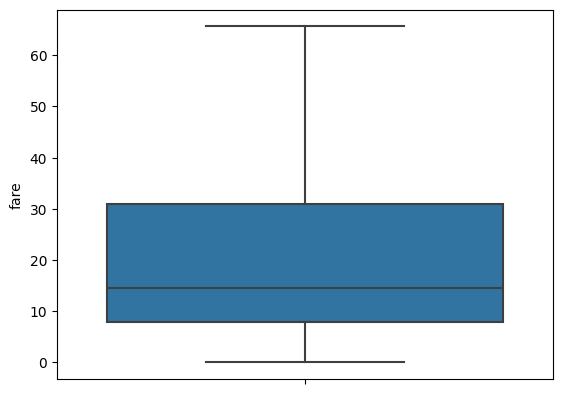

In [30]:
iqr_fare = df['fare'].quantile(0.75) - df['fare'].quantile(0.25)
df['fare'].quantile(0.75) + 1.5* iqr_fare
df.loc[(finding_outliers(df, 'fare').index, 'fare')] = df['fare'].quantile(0.75) + 1.5 * iqr_fare
sns.boxplot(y='fare', data=df)

In [31]:
df['age'].quantile(0.25) - 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25))

2.5

In [32]:
df['age'].quantile(0.75) + 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25))

54.5

In [33]:
finding_outliers(df, 'age').sort_values('age')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
803,1,3,male,0.42,0,1,8.5167,False,Cherbourg,False
755,1,2,male,0.67,1,1,14.5000,False,Southampton,False
469,1,3,female,0.75,2,1,19.2583,False,Cherbourg,False
644,1,3,female,0.75,2,1,19.2583,False,Cherbourg,False
831,1,2,male,0.83,1,1,18.7500,False,Southampton,False
...,...,...,...,...,...,...,...,...,...,...
116,0,3,male,70.50,0,0,7.7500,True,Queenstown,True
96,0,1,male,71.00,0,0,34.6542,True,Cherbourg,True
493,0,1,male,71.00,0,0,49.5042,True,Cherbourg,True
851,0,3,male,74.00,0,0,7.7750,True,Southampton,True


In [34]:
df.loc[df['age'] < df['age'].quantile(0.25) - 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25)), 
       'age'] = df['age'].quantile(0.25) - 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25))

df.loc[df['age'] > df['age'].quantile(0.75) + 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25)), 
       'age'] = df['age'].quantile(0.55) + 1.5 * (df['age'].quantile(0.75) - df['age'].quantile(0.25))

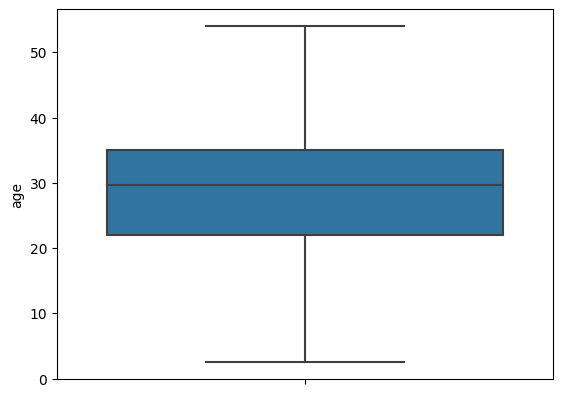

In [35]:
sns.boxplot(y = 'age', data=df);

In [36]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,65.6344,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True


In [37]:
#préparation des données 
df['sex'].replace({'female':0, 'male' : 1}, inplace= True)

In [38]:
df['adult_male'].replace({'True': 1 , 'False' : 0}, inplace=True)

In [39]:
df['adult_male']= df['adult_male'].astype('int')
df['alone']= df['alone'].astype('int')

In [40]:

embark_dummies = pd.get_dummies(df['embark_town'], drop_first=True)
embark_dummies
df = pd.concat([df, embark_dummies], axis=1)
del df['embark_town']

In [41]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,1,0,0,1
1,1,1,0,38.0,1,0,65.6344,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,1,0,1


In [42]:
df['family'] = df['sibsp'] + df['parch']

df.drop(['sibsp', 'parch'], axis=1, inplace=True)

df.head(3)

,survived,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family
0,0,3,1,22.0,7.2500,1,0,0,1,1
1,1,1,0,38.0,65.6344,0,0,0,0,1
2,1,3,0,26.0,7.9250,0,1,0,1,0


In [43]:
#division de données (test20% \ trainement 60% \validation 20%)
from sklearn.model_selection import train_test_split
seed = 111
X = df.drop('survived', axis=1)
y = df['survived'] #variable sible
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state= seed, stratify=y )
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size = 0.5, 
                                                    random_state = seed, stratify=y_test)


In [44]:
y.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [45]:
y_train.value_counts(normalize=True)

0    0.616105
1    0.383895
Name: survived, dtype: float64

In [46]:
y_val.value_counts(normalize=True)

0    0.617978
1    0.382022
Name: survived, dtype: float64

In [47]:
y_test.value_counts(normalize=True)
#normalisation de données pour avoir des variable cohérente
#problème de déséquilibre de classe : pour prévoir les personne qui n'ont pas survécue
#deux technique de rééchantillonnage : faire augmenter la classe 1 au niveau de classe B ou bien le contraire


0    0.614525
1    0.385475
Name: survived, dtype: float64

In [48]:
#methode de sur-échantillonnage
from sklearn.utils import resample
X2 = X_train
X2['survived'] = y_train.values
X2.head(3)

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
692,3,1,29.699118,56.4958,1,1,0,1,0,1
150,2,1,51.000000,12.5250,1,1,0,1,0,0
886,2,1,27.000000,13.0000,1,1,0,1,0,0


In [49]:
#df
minority = X2[X2.survived == 1]
majority = X2[X2.survived == 0]

In [50]:
minority_upsampled = resample(minority, replace=True, n_samples=len(majority))
minority_upsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
81,3,1,29.000000,9.5000,1,1,0,1,0,1
226,2,1,19.000000,10.5000,1,1,0,1,0,1
31,1,0,29.699118,65.6344,0,0,0,0,1,1
347,3,0,29.699118,16.1000,0,0,0,1,1,1
216,3,0,27.000000,7.9250,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
426,2,0,28.000000,26.0000,0,0,0,1,1,1
338,3,1,45.000000,8.0500,1,1,0,1,0,1
393,1,0,23.000000,65.6344,0,0,0,0,1,1
607,1,1,27.000000,30.5000,1,1,0,1,0,1


In [51]:
majority.shape


(329, 10)

In [52]:
upsampled=pd.concat([majority, minority_upsampled], axis=0)
upsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
150,2,1,51.000000,12.5250,1,1,0,1,0,0
886,2,1,27.000000,13.0000,1,1,0,1,0,0
149,2,1,42.000000,13.0000,1,1,0,1,0,0
249,2,1,54.000000,26.0000,1,0,0,1,1,0
464,3,1,29.699118,8.0500,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
426,2,0,28.000000,26.0000,0,0,0,1,1,1
338,3,1,45.000000,8.0500,1,1,0,1,0,1
393,1,0,23.000000,65.6344,0,0,0,0,1,1
607,1,1,27.000000,30.5000,1,1,0,1,0,1


In [54]:
upsampled['survived'].value_counts(normalize=True)

0    0.5
1    0.5
Name: survived, dtype: float64

In [55]:
X_train_up = upsampled.drop('survived', axis=1)
y_train_up = upsampled['survived']

In [56]:
#méthode sous-échantillonnage
majority_downsampled = resample(majority, replace=False, n_samples = len(minority))
majority_downsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
411,3,1,29.699118,6.8583,1,1,1,0,0,0
657,3,0,32.000000,15.5000,0,0,1,0,2,0
464,3,1,29.699118,8.0500,1,1,0,1,0,0
743,3,1,24.000000,16.1000,1,0,0,1,1,0
836,3,1,21.000000,8.6625,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
148,2,1,36.500000,26.0000,1,0,0,1,2,0
715,3,1,19.000000,7.6500,1,1,0,1,0,0
229,3,0,29.699118,25.4667,0,0,0,1,4,0
852,3,0,9.000000,15.2458,0,0,0,0,2,0


In [57]:
downsampled=pd.concat([minority, majority_downsampled], axis=0)
downsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
150,2,1,51.000000,12.5250,1,1,0,1,0,0
886,2,1,27.000000,13.0000,1,1,0,1,0,0
149,2,1,42.000000,13.0000,1,1,0,1,0,0
249,2,1,54.000000,26.0000,1,0,0,1,1,0
464,3,1,29.699118,8.0500,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
148,2,1,36.500000,26.0000,1,0,0,1,2,0
715,3,1,19.000000,7.6500,1,1,0,1,0,0
229,3,0,29.699118,25.4667,0,0,0,1,4,0
852,3,0,9.000000,15.2458,0,0,0,0,2,0


In [58]:
X_train_down = downsampled.drop(['survived'], axis=1)
y_train_down = downsampled['survived']


In [60]:
downsampled['survived'].value_counts(normalize=True)

0    1.0
Name: survived, dtype: float64

In [62]:
#MODILISATION selection des variable importantes
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(random_state=seed)
rf.fit(X_train_up, y_train_up)
accuracy_score(y_val, rf.predict(X_val))


0.7415730337078652

In [63]:
print(X_train_up.columns)
print(rf.feature_importances_)

Index(['pclass', 'sex', 'age', 'fare', 'adult_male', 'alone', 'Queenstown',
       'Southampton', 'family'],
      dtype='object')
[0.06814415 0.12502042 0.25113124 0.25282344 0.17846813 0.0130308
 0.00925858 0.01838918 0.08373406]


In [64]:
vars_imp = pd.Series(rf.feature_importances_, index = X_train_up.columns).sort_values(ascending=False)
vars_imp

fare           0.252823
age            0.251131
adult_male     0.178468
sex            0.125020
family         0.083734
pclass         0.068144
Southampton    0.018389
alone          0.013031
Queenstown     0.009259
dtype: float64

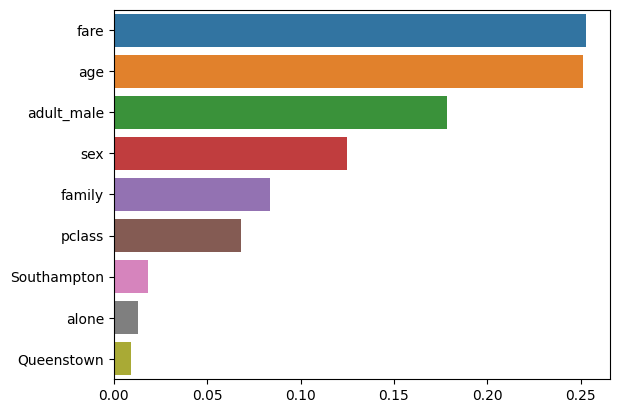

In [65]:
sns.barplot(x=vars_imp, y=vars_imp.index)
plt.show()

In [72]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(random_state= seed, max_iter=500)
lr_hyp = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
lr_cv = GridSearchCV(lr, lr_hyp, cv = 5)
lr_cv.fit(X_train_up, y_train_up)
print(lr_cv.best_score_)
print(lr_cv.best_estimator_)

0.8085241730279897
LogisticRegression(C=10, max_iter=500, random_state=111)


In [75]:
# Forêt aléatoire
RF = RandomForestClassifier(random_state=seed)
RF_hyp = {'n_estimators':[5, 10, 20, 50, 100, 200],
          'max_depth':[None, 2, 5, 10, 15, 20]}
RF_cv = GridSearchCV(RF, RF_hyp, cv = 5)
RF_cv.fit(X_train_up, y_train_up)
print(RF_cv.best_score_)
print(RF_cv.best_estimator_)

0.8784640296090677
RandomForestClassifier(n_estimators=20, random_state=111)


In [76]:
# SVM 

from sklearn.svm import SVC
sv = SVC(random_state = seed)
sv_hyp = {'C':[0.1, 1, 10], 'kernel':['linear', 'rbf']}
svm_cv = GridSearchCV(sv, sv_hyp, cv = 5)
svm_cv.fit(X_train_up, y_train_up)
print(svm_cv.best_score_)
print(svm_cv.best_estimator_)

0.8177076104557021
SVC(C=10, random_state=111)


In [77]:
# Bagging Classifier

from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(random_state=seed)
bc_hyp = {'n_estimators':[5, 10, 20, 50, 100, 200]}
bc_cv = GridSearchCV(bc, bc_hyp, cv = 5)
bc_cv.fit(X_train_up, y_train_up)
print(bc_cv.best_score_)
print(bc_cv.best_estimator_)

0.8768910478834142
BaggingClassifier(n_estimators=20, random_state=111)


In [78]:
# Evaluation des performances et choix du modèle

def model_evaluation(model, features, labels):
  pred = model.predict(features)
  score = accuracy_score(y_val, pred)
  print('Score global du modèle :', round(score, 3))

In [81]:
models = [lr_cv.best_estimator_, RF_cv.best_estimator_, 
          svm_cv.best_estimator_, bc_cv.best_estimator_]

for model in models:
  print('Modèle ' + str(model))
  model_evaluation(model, X_val, y_val)
  print('-'*90)

Modèle LogisticRegression(C=10, max_iter=500, random_state=111)
Score global du modèle : 0.775
------------------------------------------------------------------------------------------
Modèle RandomForestClassifier(n_estimators=20, random_state=111)
Score global du modèle : 0.742
------------------------------------------------------------------------------------------
Modèle SVC(C=10, random_state=111)
Score global du modèle : 0.747
------------------------------------------------------------------------------------------
Modèle BaggingClassifier(n_estimators=20, random_state=111)
Score global du modèle : 0.764
------------------------------------------------------------------------------------------


In [85]:
# Performance du meilleur modèle sur les données de test

accuracy_score(y_test, bc_cv.best_estimator_.predict(X_test))


0.8100558659217877